## Training a simple linear regression model with 1 variable (`univariate linear regression`)

$$ f_{w,b}(x) = wx + b $$

### Where `x` is the input & `w` and `b` will be updated via gradient descent

## Data Loading

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from extra_files.lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl

In [38]:
trainDF = pd.read_csv('../../data/house_prices/train.csv')
trainDF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
# x_train is the input variable (year built)
# y_train is the target (price in 1000s of dollars)
x_train = np.array(trainDF['YearBuilt'])
y_train = np.array(trainDF['SalePrice'])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [2003 1976 2001 ... 1941 1950 1965]
y_train = [208500 181500 223500 ... 266500 142125 147500]


In [41]:
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 1460


### Data visualization

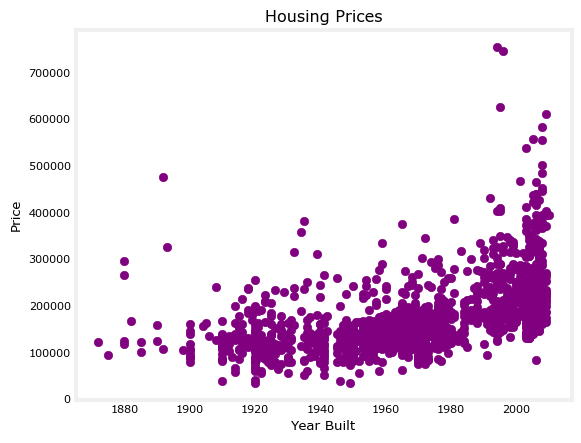

In [42]:
# Plot the data points
plt.scatter(x_train, y_train, c='purple')

plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Year Built')
plt.show()

## Computing model's function output

### for $x^{(i)}$, `f_wb = w * x[i] + b`

In [9]:
# x: input vector
# w & b: trainable coefficients
def compute_model_output(x, w, b):
    # computing prediction of linear model
    m = len(x)
    
    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w * x[i] + b
    
    return f_wb

### Plotting manual prediction

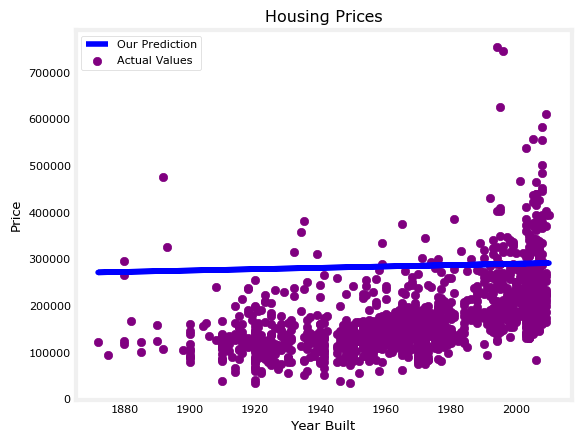

In [31]:
w = 145
b = 0.123

prediction = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, prediction, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, c='purple',label='Actual Values')


plt.title("Housing Prices")
plt.ylabel('Price')
plt.xlabel('Year Built')

plt.legend()
plt.show()

## Computing cost

#### Cost function: Measures the difference between the model's predictions & the actual true values for y.

### `Squared error` cost function
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

In [43]:
def compute_cost(x, y, w, b):

    m = len(x)
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    
    total_cost = 1 / (2 * m) * cost
    
    return total_cost

## Gradient descent

### `Computing gradients`

### - We first need to take the `partial derivatives` of this function in respsects to `w` & `b`
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

### - That gives us
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [44]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

### Putting it all together: (1) `calculate gradients` (2) `update parameters` (3) `repeate until convergence`

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [45]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

### Running Gradient Descent

In [46]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 2.49e+19  dj_dw: -3.579e+08, dj_db: -1.809e+05   w:  3.579e+06, b: 1.80921e+03


C:\Users\Juve\AppData\Local\Temp\ipykernel_18748\52029282.py:8: RuntimeWarning: overflow encountered in scalar power
  cost = cost + (f_wb - y[i])**2
C:\Users\Juve\AppData\Local\Temp\ipykernel_18748\255131020.py:23: RuntimeWarning: overflow encountered in scalar add
  dj_dw += dj_dw_i
C:\Users\Juve\AppData\Local\Temp\ipykernel_18748\1926063390.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  w = w - alpha * dj_dw


Iteration 1000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 2000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 3000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 4000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 5000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 6000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 7000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 8000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
Iteration 9000: Cost nan  dj_dw:  nan, dj_db:  nan   w:  nan, b: nan
(w,b) found by gradient descent: (     nan,     nan)


## Evaluation

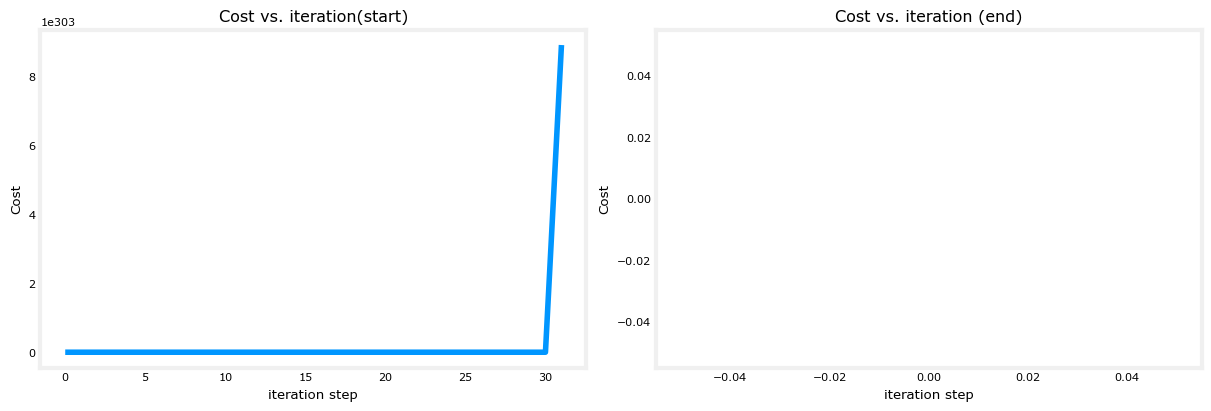

In [47]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Predictions

In [48]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction nan Thousand dollars
1200 sqft house prediction nan Thousand dollars
2000 sqft house prediction nan Thousand dollars


In [32]:
x_small_demo_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_small_demo_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

x_large_demo_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_large_demo_train = np.array([250, 300, 480,  430,   630, 730,])

In [33]:
plt_intuition(x_small_demo_train,y_small_demo_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

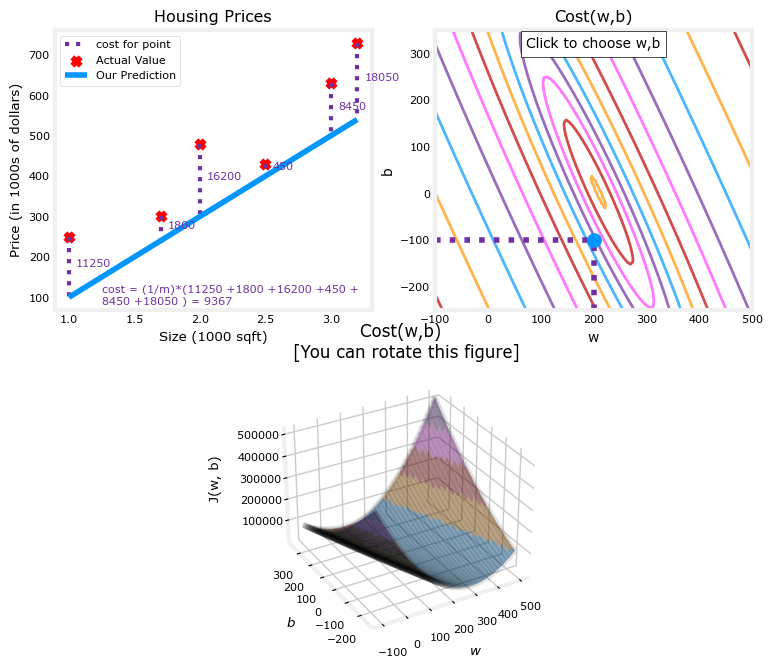

In [34]:
plt.close('all')
fig, ax, dyn_items = plt_stationary(x_large_demo_train, y_large_demo_train)
updater = plt_update_onclick(fig, ax, x_large_demo_train, y_large_demo_train, dyn_items)